In [1]:
from sklearn.datasets import load_wine
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb
from scipy.spatial import ConvexHull, Delaunay
import pickle
import os
import time
# import torch
# import torch.nn as nn
from tqdm.auto import tqdm
import numpy as np

In [2]:

csv_df = pd.read_csv('/Users/swarchol/Research/exemplar-001/new/updated.csv')

In [3]:
csv_df.columns


Index(['CellID', 'DNA_6', 'ELANE', 'CD57', 'CD45', 'DNA_7', 'CD11B', 'SMA',
       'CD16', 'DNA_8', 'ECAD', 'FOXP3', 'NCAM', 'X_centroid', 'Y_centroid',
       'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'Solidity', 'Extent', 'Orientation', 'UMAP_X', 'UMAP_Y', 'kmeans',
       'agcluster', 'EEMB_x', 'EEMB_y'],
      dtype='object')

In [4]:
columns = csv_df.columns
feature_columns = [ 'DNA_6', 'ELANE', 'CD57', 'CD45', 'DNA_7', 'CD11B', 'SMA',
       'CD16', 'DNA_8', 'ECAD', 'FOXP3', 'NCAM',]

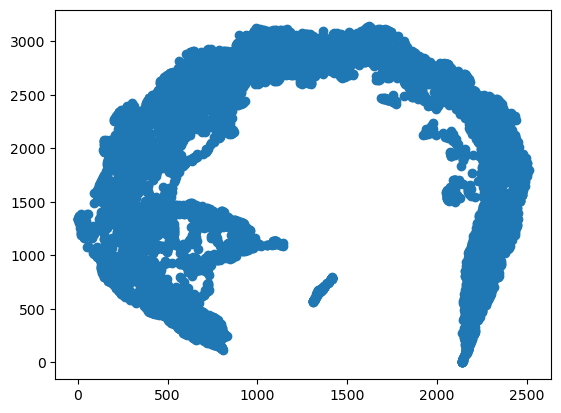

In [5]:
plt.scatter(csv_df['UMAP_X'], csv_df['UMAP_Y'])


In [6]:
# regressor = xgb.XGBRegressor()
# regressor = xgb.XGBRegressor(
#                  n_estimators=2000,
#                  max_depth=9,
#                  seed=1000)
regressor = xgb.XGBRegressor(
                 n_estimators=1000,
                 max_depth=5,
                 seed=1000)
# !wget https://vae-bed.s3.us-east-2.amazonaws.com/xgb_regressor.json -O xgb_regressor.json
# regressor.load_model('xgb_regressor.json')
regressor.fit(csv_df[feature_columns].to_numpy(), csv_df[['UMAP_X','UMAP_Y']])



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

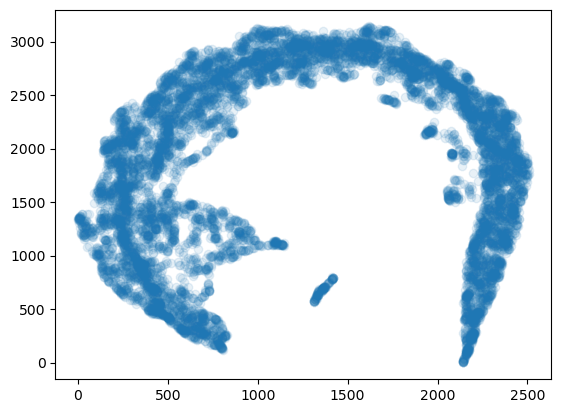

In [7]:
xgb_preds = regressor.predict(csv_df[feature_columns].to_numpy())
plt.scatter(xgb_preds[:,0], xgb_preds[:,1], alpha=0.1)

In [8]:

# regressor.fit(csv_df[feature_columns], csv_df[['UMAP_X','UMAP_Y']])
# Save Regressor
# with open('xgb_regressor.pkl', 'wb') as f:
#     pickle.dump(regressor, f)

In [9]:
# with open('xgb_regressor.pkl', 'rb') as f:
#     regressor = pickle.load(f)


In [10]:
# regressor.save_model('xgb_regressor.json')
explainer = shap.Explainer(regressor)


In [11]:
csv_df[feature_columns].to_numpy()

array([[17597.44347826,  1176.79130435,   160.7826087 , ...,
          704.26956522,   201.77391304,   853.14782609],
       [18031.08695652,  1125.2826087 ,   176.93478261, ...,
         1027.83695652,   387.5       ,   902.48913043],
       [ 8402.59677419,  1249.53225806,   156.9516129 , ...,
         1327.27419355,   289.08064516,   940.20967742],
       ...,
       [24690.94202899,  1173.76811594,   206.2173913 , ...,
          911.7826087 ,   271.4057971 ,   956.2173913 ],
       [21059.90322581,  1159.64516129,   224.3655914 , ...,
          935.08602151,   277.56989247,   879.67741935],
       [23099.34328358,  1175.65671642,   231.19402985, ...,
          560.91044776,   168.35820896,   844.91044776]])

In [12]:
shap_values = explainer(csv_df[feature_columns].to_numpy())

In [16]:
shap_values = np.abs(shap_values.values)

In [21]:
alphabetical_features = sorted(feature_columns)
indices = [feature_columns.index(feature) for feature in alphabetical_features]
indices
# shap_values = shap_values[:, alphabetical_features]
alphabetical_shap_values = shap_values[:, indices]




In [22]:
alphabetical_shap_values

array([[[1.58737354e+01, 1.26810555e+02],
        [1.00196161e+01, 1.03069315e+01],
        [2.27586341e+00, 1.28750629e+01],
        ...,
        [1.02901344e+01, 1.30661972e+02],
        [8.65011311e+00, 3.79687023e+00],
        [2.31893196e+01, 1.96573620e+01]],

       [[2.10942794e-02, 4.02746916e+00],
        [1.37584639e+00, 9.62157249e-01],
        [8.11467707e-01, 6.32015753e+00],
        ...,
        [2.25870967e+00, 4.38881207e+00],
        [2.17536688e+00, 2.10469508e+00],
        [1.36197433e+01, 3.83597565e+01]],

       [[9.05451775e-01, 4.57484388e+00],
        [9.27120820e-02, 1.13604081e+00],
        [5.54448962e-01, 2.05164981e+00],
        ...,
        [3.31022024e+00, 2.03490734e+00],
        [1.43374853e+01, 7.34342396e-01],
        [8.35974693e+00, 7.78547430e+00]],

       ...,

       [[8.19220006e-01, 8.79605675e+00],
        [2.31823969e+00, 1.79874268e+01],
        [2.74353004e+00, 2.20516658e+00],
        ...,
        [9.38967705e+00, 1.79870243e+01],
     

In [23]:
np.save('alphabetical_shap_values_exemplar.npy', alphabetical_shap_values)

In [25]:
alphabetical_shap_values.shape

(11170, 12, 2)